In [1]:
# 1. Create list of json files for each Rat. 
#    Available scans per sample 
# 2. First decice on the ratio criteria. How to choose the big pore size. 
# First plot the histogram of the blob volumes for three differnt groups. 

In [1]:
import os 
from glob import glob 
import matplotlib.pyplot as plt 
import numpy as np

import json
import pandas as pd 

from tqdm.notebook import tqdm 



In [2]:
# Directory where the scans are stored with results 
root_dir = 'D:\sagar\Data'

In [3]:
# Getting the scans where pypore3d analysis has been run 
scans = []
for p in os.listdir(root_dir):
    file_path = os.path.join(root_dir, p, 'porespy')
    if os.path.exists(file_path):
        scans.append(p)

In [4]:
#Randomly chose three different samples from three different groups and then set a thresold for blob volume and check if the ratio make sense.
import random

In [5]:
# Control-VILI
cntrl_vili_path = 'D:\sagar\Data\MD_1264_A10_Z6.6mm\porespy'
# Bleomycine-VILI
bleo_vili_path = 'D:\sagar\Data\MD_1264_A9_Z0.0mm_Z3.3mm\porespy'
# Bleomycine 
bleo_path = 'D:\sagar\Data\MD_1264_A6_1_Z3.3mm_corr_phrt\porespy'


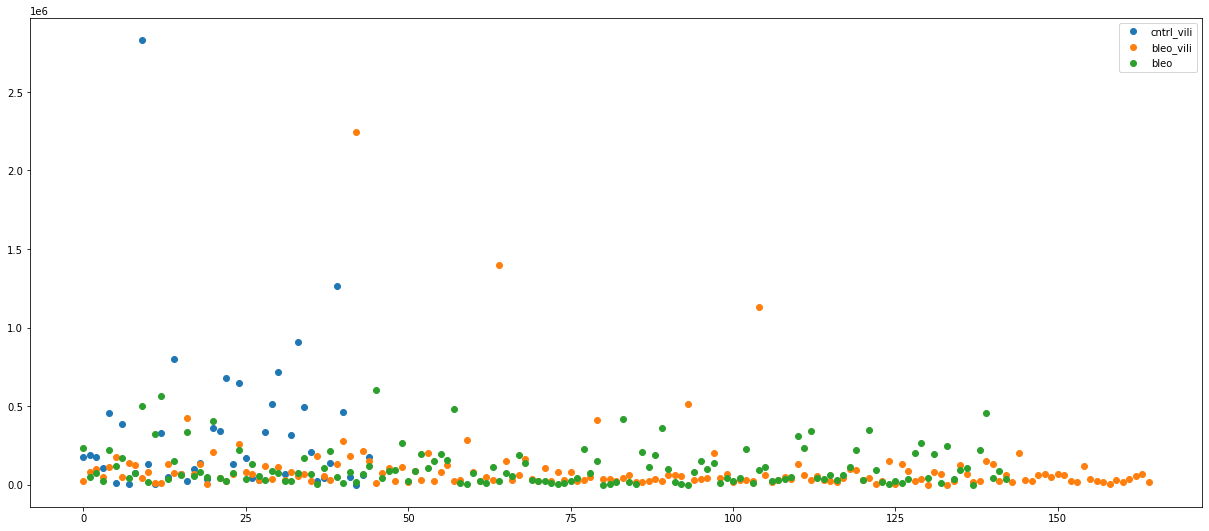

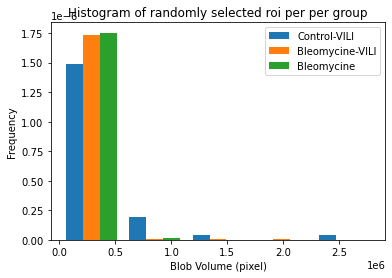

In [13]:
fig = plt.figure(figsize=(21,9))

data_list = []

for sample, path in zip(['cntrl_vili', 'bleo_vili', 'bleo'], list([cntrl_vili_path, bleo_vili_path, bleo_path])):
    aFile = random.choice(glob(path + '/*_dth12.json'))
    file = open(aFile)
    data = json.load(file)
    file.close()
    data_list.append(data['volume'])
    plt.plot(data['volume'], 'o',label=sample)

plt.legend()
plt.show()


fig = plt.figure()
# Set up the plot
plt.hist(data_list, bins=5, label=['Control-VILI', 'Bleomycine-VILI', 'Bleomycine'], density=True)

# Add a title and labels
plt.title('Histogram of randomly selected roi per per group')
plt.xlabel('Blob Volume (pixel)')
plt.ylabel('Frequency')
# Add a legend
plt.legend()

# Show the plot
plt.show()


In [14]:
blob_volume = data['volume']

In [15]:
min(blob_volume)

400

In [58]:
def threshold_ratio(lst, threshold):
    # Count the number of elements in the list greater than or equal to the threshold
    count = sum(1 for i in lst if i >= threshold)
    
    # Calculate the ratio of elements greater than or equal to the threshold to the total number of elements
    ratio = count / len(lst)
    
    # Return the ratio
    return ratio

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

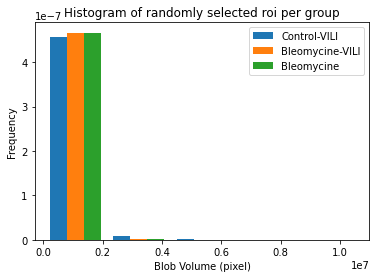

In [143]:
# Control-VILI
cntrl_vili_path = 'D:\sagar\Data\MD_1264_A10_Z6.6mm\porespy'
# Bleomycine-VILI
bleo_vili_path = 'D:\sagar\Data\MD_1264_A9_Z0.0mm_Z3.3mm\porespy'
# Bleomycine 
bleo_path = 'D:\sagar\Data\MD_1264_A6_1_Z3.3mm_corr_phrt\porespy'

data_list = []
for path in list([cntrl_vili_path, bleo_vili_path, bleo_path]):
    feature = []
    for afile in tqdm(glob(path + '/*_dth12.json')):
        file = open(afile)
        data = json.load(file)
        file.close()
        feature += data['volume']
    data_list.append(feature)

fig = plt.figure()
# Set up the plot
plt.hist(data_list, bins=5, density=True, label=['Control-VILI', 'Bleomycine-VILI', 'Bleomycine'])

# Add a title and labels
plt.title('Histogram of randomly selected roi per group')
plt.xlabel('Blob Volume (pixel)')
plt.ylabel('Frequency')
# Add a legend
plt.legend()

# Show the plot
plt.show()

In [124]:

def plot_histogram(cntrl_vili_path, bleo_vili_path, bleo_path, file_pattern, **kwargs):
    # Extract labels from the input paths
    labels = ['Control-VILI', 'Bleomycine-VILI', 'Bleomycine']

    data_list = []
    for path in list([cntrl_vili_path, bleo_vili_path, bleo_path]):
        feature = []
        for afile in tqdm(glob(path + file_pattern)):
            with open(afile, 'r') as file:
                data = json.load(file)
            feature += data['volume']
        data_list.append(feature)

    fig = plt.figure(figsize=(16,9))
    # Set up the plot
    plt.hist(data_list, label=labels, **kwargs)

    # Add a title and labels
    plt.title('Histogram of randomly selected roi per group')
    plt.xlabel('Blob Volume (pixel)')
    plt.ylabel('Frequency')
    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()


  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

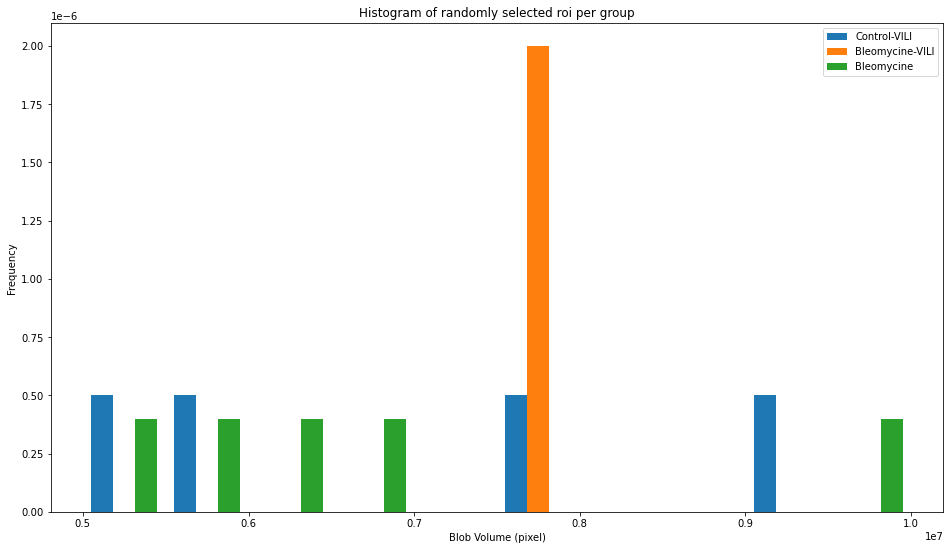

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

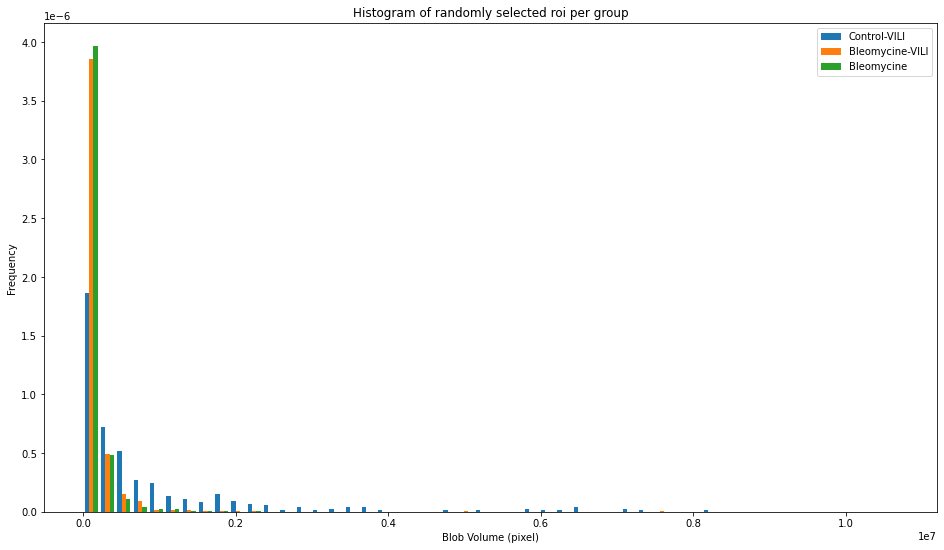

In [160]:
# Control-VILI
cntrl_vili_path = 'D:\sagar\Data\MD_1264_A10_Z6.6mm\porespy'
# Bleomycine-VILI
bleo_vili_path = 'D:\sagar\Data\MD_1264_A9_Z0.0mm_Z3.3mm\porespy'
# Bleomycine 
bleo_path = 'D:\sagar\Data\MD_1264_A6_1_Z3.3mm_corr_phrt\porespy'

plot_histogram(cntrl_vili_path, bleo_vili_path, bleo_path, file_pattern='/*_dth12.json', bins=10, density=True, range=(0.5e7, 1e7))

# Control-VILI
cntrl_vili_path = 'D:\sagar\Data\MD_1264_A4_1_Z0.0mm_Z0.0mm_corr_phrt\porespy'
# Bleomycine-VILI
bleo_vili_path = 'D:\sagar\Data\MD_1264_A9_Z0.0mm_Z3.3mm\porespy'
# Bleomycine 
bleo_path = 'D:\sagar\Data\MD_1264_A6_1_Z3.3mm_corr_phrt\porespy'

plot_histogram(cntrl_vili_path, bleo_vili_path, bleo_path, file_pattern='/*_dth12.json', bins=50, density=True)

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

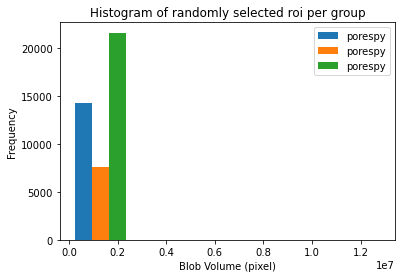

In [96]:
plot_histogram(cntrl_vili_path, bleo_vili_path, bleo_path, file_pattern='/*_dth8.json')

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

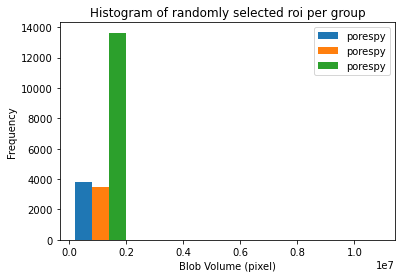

In [97]:
plot_histogram(cntrl_vili_path, bleo_vili_path, bleo_path, file_pattern='/*_dth10.json')

In [98]:
str(cntrl_vili_path)

'D:\\sagar\\Data\\MD_1264_A10_Z6.6mm\\porespy'

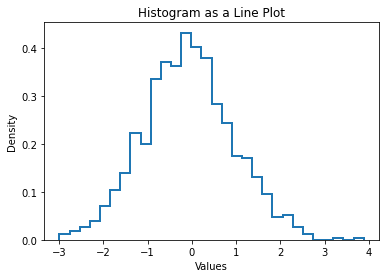

In [65]:
# Example data
data = np.random.normal(size=1000)

# Create a histogram
n, bins, patches = plt.hist(data, bins=30, density=True, histtype='step', linewidth=2)

# Add a title and labels
plt.title('Histogram as a Line Plot')
plt.xlabel('Values')
plt.ylabel('Density')

# Show the plot
plt.show()


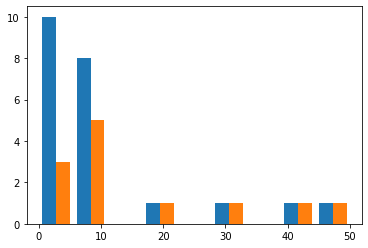

In [171]:
aList = np.array([0, 1, 2, 3, 4, 5, 20, 30, 40, 50, 6, 7, 8, 9, 2, 3, 6, 7, 9, 2, 5, 6])
bList = np.array([0, 8, 9, 2, 3, 6, 7,10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 600])
fig = plt.figure()
# Set up the plot
plt.hist([aList, bList], bins=9, density=False, range=(0, 50))
# Show the plot
plt.show()